## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
main_df = study_results.merge(mouse_metadata, on='Mouse ID')
# Display the data table for preview
main_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
main_df['Mouse ID'].value_counts().count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

main_df[main_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

main_df[main_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = main_df[main_df['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts().count()

248

## Summary Statistics

In [7]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

grp = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
pd.DataFrame({'mean':grp.mean(), 'median':grp.median(),'var':grp.var(),'std':grp.std(),'sem':grp.sem()})

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

grp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

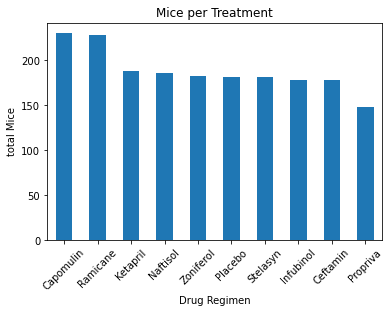

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
clean_df['Drug Regimen'].value_counts().plot(kind='bar',rot=45, title='Mice per Treatment')
plt.xlabel("Drug Regimen")
plt.ylabel('total Mice')
plt.show()

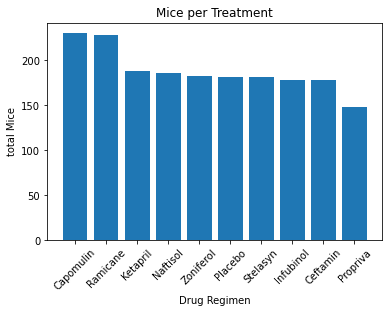

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts)
plt.xlabel("Drug Regimen")
plt.ylabel('total Mice')
plt.title('Mice per Treatment')
plt.xticks(rotation=45)
plt.show()

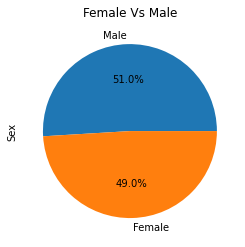

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df.Sex.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Female Vs Male')
plt.show()

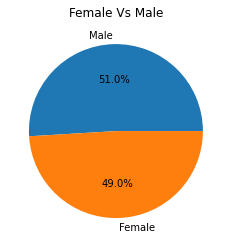

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df.Sex.value_counts()
plt.pie(sex_counts, autopct='%1.1f%%', labels=sex_counts.index)
plt.title('Female Vs Male')
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_df = clean_df.groupby('Mouse ID').max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_df[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'],how='left')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    tumor_data = merged_df[merged_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    iqr = tumor_data.quantile(.75) - tumor_data.quantile(.25)
    lower_bound = tumor_data.quantile(.25) - (1.5*iqr)
    upper_bound = tumor_data.quantile(.75) + (1.5*iqr)


# tumor_list.append(drug)
#     tumor_list.append({drug:{'data':tumor_data,'outliers':tumor_data[(tumor_data<lower_bound)|(tumor_data>upper_bound)]}})
    tumor_list.append(tumor_data)
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
# tumor_list
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    print(f'{drug} potential outliers: {tumor_data[(tumor_data<lower_bound)|(tumor_data>upper_bound)]}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


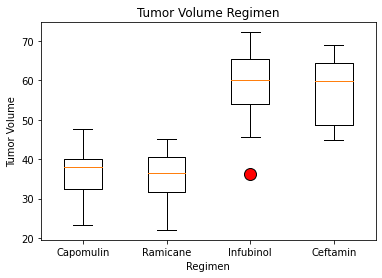

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list,labels = drugs, flierprops ={'markerfacecolor':'red','markersize':12})
plt.title('Tumor Volume Regimen')
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

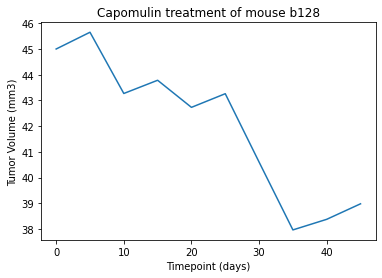

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
mouse_data = capo[capo['Mouse ID']=='b128']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')
plt.show()

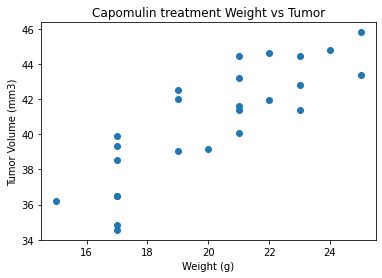

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg = capo.groupby('Mouse ID').mean()
plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment Weight vs Tumor')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


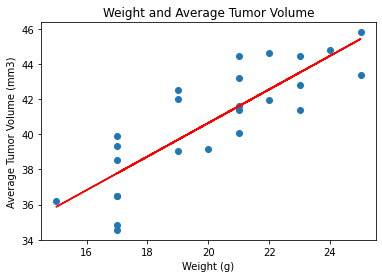

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])[0],2)
print(f'The correlation between mouse weight and the average tumor volume is {corr}.')
model = st.linregress(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
y = cap_avg['Weight (g)']*model[0] + model[1]
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'], y, color='red')
plt.title("Weight and Average Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()